In [70]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from zipfile import ZipFile

In [71]:
np.random.seed(13)

In [8]:
with ZipFile('/content/axial.zip', 'r') as zip:
    zip.extractall('/content/data/')

In [72]:
BATCH_SIZE = 32
IMG_SIZE = (128, 128)

In [73]:
train_data = tf.keras.utils.image_dataset_from_directory('/content/data/axial/training',
                                                         shuffle = True,
                                                         validation_split = 0.2,
                                                         subset = 'training',
                                                         seed = 13,
                                                         image_size = IMG_SIZE,
                                                         batch_size = BATCH_SIZE)

Found 1078 files belonging to 4 classes.
Using 863 files for training.


In [74]:
val_data = tf.keras.utils.image_dataset_from_directory('/content/data/axial/training',
                                                         shuffle = True,
                                                         validation_split = 0.2,
                                                         subset = 'validation',
                                                         seed = 13,
                                                         image_size = IMG_SIZE,
                                                         batch_size = BATCH_SIZE)

Found 1078 files belonging to 4 classes.
Using 215 files for validation.


In [75]:
test_data = tf.keras.utils.image_dataset_from_directory('/content/data/axial/testing',
                                                         shuffle = True,
                                                         seed = 13,
                                                         image_size = IMG_SIZE,
                                                         batch_size = BATCH_SIZE)

Found 240 files belonging to 4 classes.


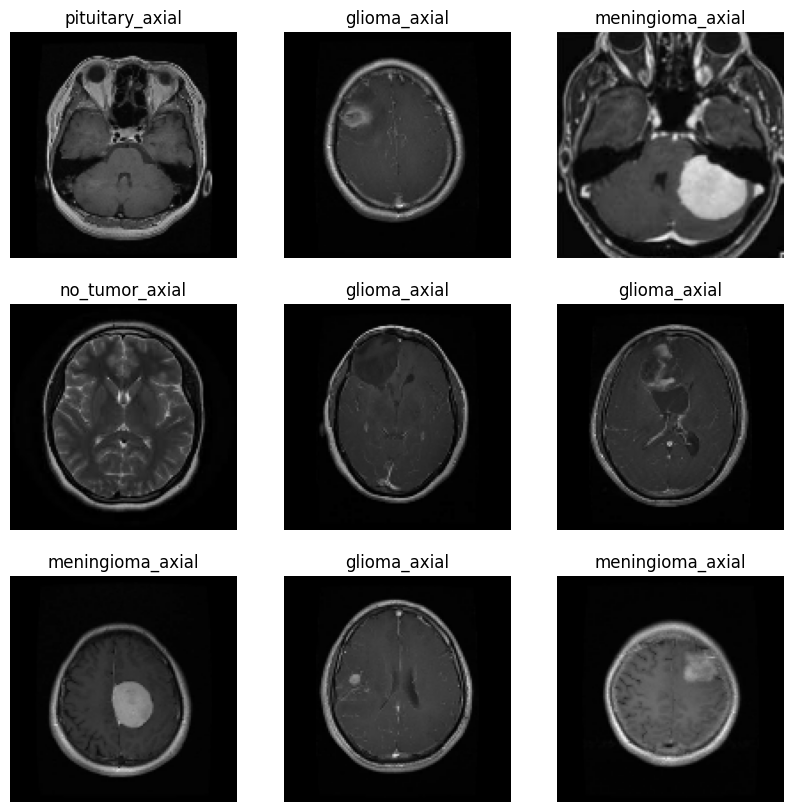

In [76]:
class_names = train_data.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [61]:
directory_path = "/content/data/axial/training/glioma_axial/"
count = 0

for item in os.listdir(directory_path):
        item_path = os.path.join(directory_path, item)
        if os.path.isfile(item_path):
            count += 1

print('File Count:', count)

File Count: 264


In [63]:
directory_path = "/content/data/axial/training/meningioma_axial/"
count = 0

for item in os.listdir(directory_path):
        item_path = os.path.join(directory_path, item)
        if os.path.isfile(item_path):
            count += 1

print('File Count:', count)

File Count: 293


In [64]:
directory_path = "/content/data/axial/training/pituitary_axial/"
count = 0

for item in os.listdir(directory_path):
        item_path = os.path.join(directory_path, item)
        if os.path.isfile(item_path):
            count += 1

print('File Count:', count)

File Count: 259


In [65]:
directory_path = "/content/data/axial/training/no_tumor_axial/"
count = 0

for item in os.listdir(directory_path):
        item_path = os.path.join(directory_path, item)
        if os.path.isfile(item_path):
            count += 1

print('File Count:', count)

File Count: 262


The dataset is nicely balanced. Based on this information, accuracy will be used as a metric for model evaluation.

In [77]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(scale=1./255, offset=0.0, input_shape = (128, 128, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [78]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 128)      

In [80]:
model.fit(
  train_data,
  validation_data = val_data,
  epochs=10
)

Epoch 1/10
27/27 [==============================] - 32s 1s/step - loss: 1.1624 - accuracy: 0.4809 - val_loss: 0.8491 - val_accuracy: 0.6465
Epoch 2/10
27/27 [==============================] - 30s 1s/step - loss: 0.7147 - accuracy: 0.7196 - val_loss: 0.6117 - val_accuracy: 0.7535
Epoch 3/10
27/27 [==============================] - 30s 1s/step - loss: 0.5362 - accuracy: 0.7903 - val_loss: 0.5509 - val_accuracy: 0.7674
Epoch 4/10
27/27 [==============================] - 33s 1s/step - loss: 0.4678 - accuracy: 0.8204 - val_loss: 0.5748 - val_accuracy: 0.7395
Epoch 5/10
27/27 [==============================] - 31s 1s/step - loss: 0.4057 - accuracy: 0.8552 - val_loss: 0.5438 - val_accuracy: 0.7721
Epoch 6/10
27/27 [==============================] - 30s 1s/step - loss: 0.3380 - accuracy: 0.8795 - val_loss: 0.4229 - val_accuracy: 0.7953
Epoch 7/10
27/27 [==============================] - 33s 1s/step - loss: 0.2244 - accuracy: 0.9224 - val_loss: 0.4404 - val_accuracy: 0.8465
Epoch 8/10
27/27 [==

In [28]:
model.save('/content/model_baseline.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [81]:
model_dropout = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(scale=1./255, offset=0.0, input_shape = (128, 128, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [82]:
model_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [83]:
model_dropout.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 128)      

In [84]:
model_dropout.fit(
  train_data,
  validation_data = val_data,
  epochs=10
)

Epoch 1/10
27/27 [==============================] - 32s 1s/step - loss: 1.1753 - accuracy: 0.5330 - val_loss: 1.0196 - val_accuracy: 0.6093
Epoch 2/10
27/27 [==============================] - 34s 1s/step - loss: 0.7545 - accuracy: 0.6860 - val_loss: 0.5986 - val_accuracy: 0.7442
Epoch 3/10
27/27 [==============================] - 49s 2s/step - loss: 0.5870 - accuracy: 0.7775 - val_loss: 0.5421 - val_accuracy: 0.7674
Epoch 4/10
27/27 [==============================] - 30s 1s/step - loss: 0.4742 - accuracy: 0.8227 - val_loss: 0.4600 - val_accuracy: 0.7860
Epoch 5/10
27/27 [==============================] - 32s 1s/step - loss: 0.4398 - accuracy: 0.8389 - val_loss: 0.4739 - val_accuracy: 0.8140
Epoch 6/10
27/27 [==============================] - 30s 1s/step - loss: 0.3737 - accuracy: 0.8725 - val_loss: 0.3755 - val_accuracy: 0.8372
Epoch 7/10
27/27 [==============================] - 30s 1s/step - loss: 0.3251 - accuracy: 0.8830 - val_loss: 0.4014 - val_accuracy: 0.8279
Epoch 8/10
27/27 [==

In [101]:
model_contrast = tf.keras.models.Sequential([
    tf.keras.layers.RandomContrast(1.0, 1.4, input_shape = (128, 128, 3)),
    tf.keras.layers.Rescaling(scale=1./255, offset=0.0),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [102]:
model_contrast.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [103]:
model_contrast.fit(
  train_data,
  validation_data = val_data,
  epochs=10
)

Epoch 1/10
27/27 [==============================] - 110s 4s/step - loss: 1.1233 - accuracy: 0.5075 - val_loss: 0.6824 - val_accuracy: 0.6837
Epoch 2/10
27/27 [==============================] - 126s 5s/step - loss: 0.8283 - accuracy: 0.6640 - val_loss: 0.5396 - val_accuracy: 0.7581
Epoch 3/10
27/27 [==============================] - 113s 4s/step - loss: 0.6010 - accuracy: 0.7752 - val_loss: 0.5854 - val_accuracy: 0.7535
Epoch 4/10
27/27 [==============================] - 112s 4s/step - loss: 0.5366 - accuracy: 0.7822 - val_loss: 0.5184 - val_accuracy: 0.8093
Epoch 5/10
27/27 [==============================] - 110s 4s/step - loss: 0.5717 - accuracy: 0.7868 - val_loss: 0.5596 - val_accuracy: 0.7395
Epoch 6/10
27/27 [==============================] - 106s 4s/step - loss: 0.5851 - accuracy: 0.8053 - val_loss: 0.5439 - val_accuracy: 0.7953
Epoch 7/10
27/27 [==============================] - 121s 5s/step - loss: 0.3370 - accuracy: 0.8795 - val_loss: 0.5749 - val_accuracy: 0.8093
Epoch 8/10
27

This is the last time I am using tf dataset. Getting anything from it too complicated + the documentation does not present the methods that can be used with the classes in a clear matter. Never again.

In [104]:
model_contrast_dropout = tf.keras.models.Sequential([
    tf.keras.layers.RandomContrast(1.0, 1.4, input_shape = (128, 128, 3)),
    tf.keras.layers.Rescaling(scale=1./255, offset=0.0),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [105]:
model_contrast_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [106]:
model_contrast_dropout.fit(
  train_data,
  validation_data = val_data,
  epochs=10
)

Epoch 1/10
27/27 [==============================] - 104s 4s/step - loss: 1.1990 - accuracy: 0.4728 - val_loss: 0.8957 - val_accuracy: 0.6233
Epoch 2/10
27/27 [==============================] - 102s 4s/step - loss: 0.8063 - accuracy: 0.6848 - val_loss: 0.8102 - val_accuracy: 0.6465
Epoch 3/10
27/27 [==============================] - 103s 4s/step - loss: 0.6862 - accuracy: 0.7219 - val_loss: 0.5530 - val_accuracy: 0.7767
Epoch 4/10
27/27 [==============================] - 106s 4s/step - loss: 0.6677 - accuracy: 0.7497 - val_loss: 0.4929 - val_accuracy: 0.7907
Epoch 5/10
27/27 [==============================] - 101s 4s/step - loss: 0.7114 - accuracy: 0.7497 - val_loss: 0.5904 - val_accuracy: 0.7814
Epoch 6/10
27/27 [==============================] - 105s 4s/step - loss: 0.6211 - accuracy: 0.7613 - val_loss: 0.5695 - val_accuracy: 0.7581
Epoch 7/10
27/27 [==============================] - 105s 4s/step - loss: 0.5028 - accuracy: 0.8216 - val_loss: 0.5105 - val_accuracy: 0.8047
Epoch 8/10
27